# CNN-LSTM

In [30]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import pydot
import graphviz

%matplotlib inline
plt.style.use("ggplot")

In [51]:
#loading dataset

dataset = pd.read_csv('/content/AAPL.csv')
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,24.151497,270597600
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.546280,223164000
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,23.085480,273829600
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,22.111170,324377600
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.228085,283192000
...,...,...,...,...,...,...,...
1716,2022-10-26,150.960007,151.990005,148.039993,149.350006,149.350006,88194300
1717,2022-10-27,148.070007,149.050003,144.130005,144.800003,144.800003,109180200
1718,2022-10-28,148.199997,157.500000,147.820007,155.740005,155.740005,164762400
1719,2022-10-31,153.160004,154.240005,151.919998,153.339996,153.339996,97943200


In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1721 non-null   object 
 1   Open       1721 non-null   float64
 2   High       1721 non-null   float64
 3   Low        1721 non-null   float64
 4   Close      1721 non-null   float64
 5   Adj Close  1721 non-null   float64
 6   Volume     1721 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 94.2+ KB


In [53]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1.721000e+03
mean,77.639002,78.536384,76.792727,77.704021,76.310556,1.219086e+08
std,48.962329,49.615511,48.322868,48.992810,49.483082,5.775616e+07
min,22.500000,22.917500,22.367500,22.584999,20.949608,4.100000e+07
25%,38.992500,39.307499,38.619999,38.974998,37.053890,8.418310e+07
50%,52.540001,53.162498,52.064999,52.487499,51.112251,1.064056e+08
75%,126.820000,127.930000,125.209999,126.660004,125.378540,1.417080e+08
max,182.630005,182.940002,179.119995,182.009995,181.259918,5.334788e+08


In [54]:
#Counting missing values
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [55]:
dataset.reset_index(drop=True, inplace=True)
dataset.fillna(dataset.mean(), inplace=True)
dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,24.151497,270597600
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.546280,223164000
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,23.085480,273829600
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,22.111170,324377600
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.228085,283192000


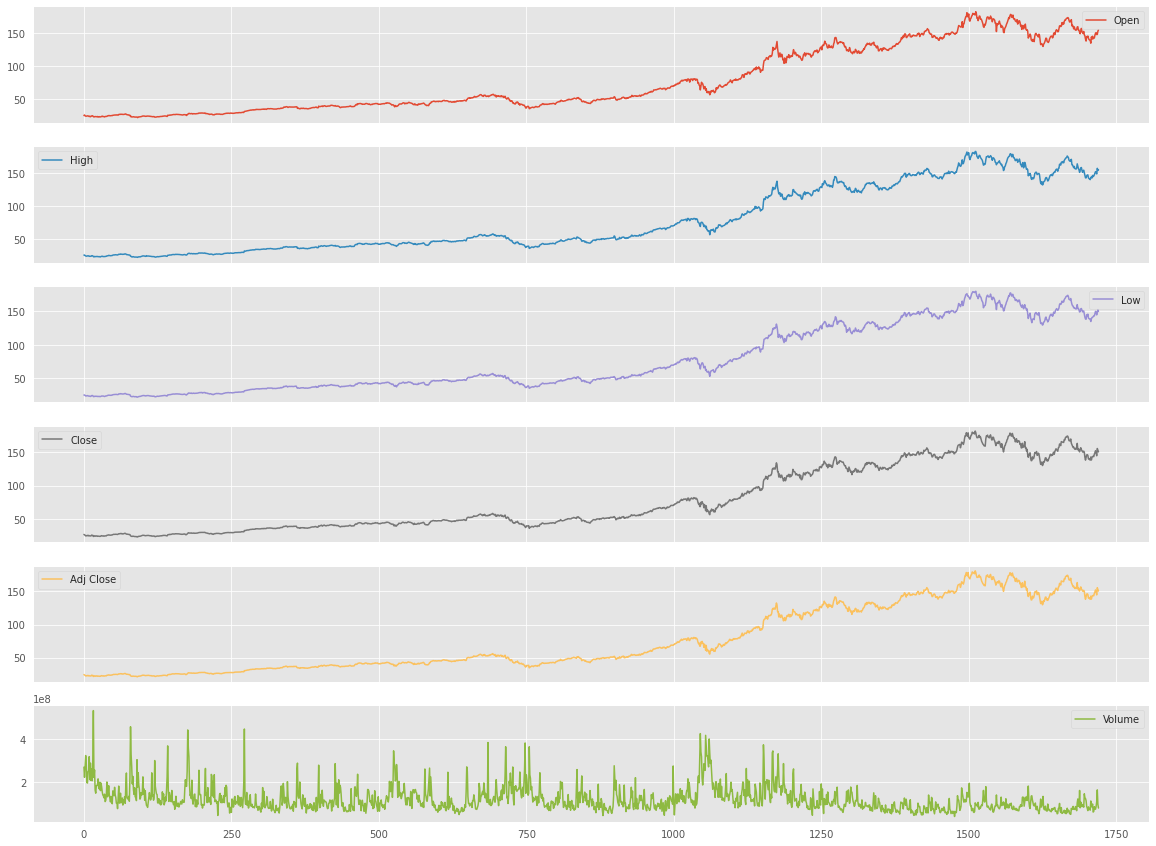

In [56]:
#plotting dataset

dataset.plot(legend=True,subplots=True, figsize = (20, 15))
plt.show()

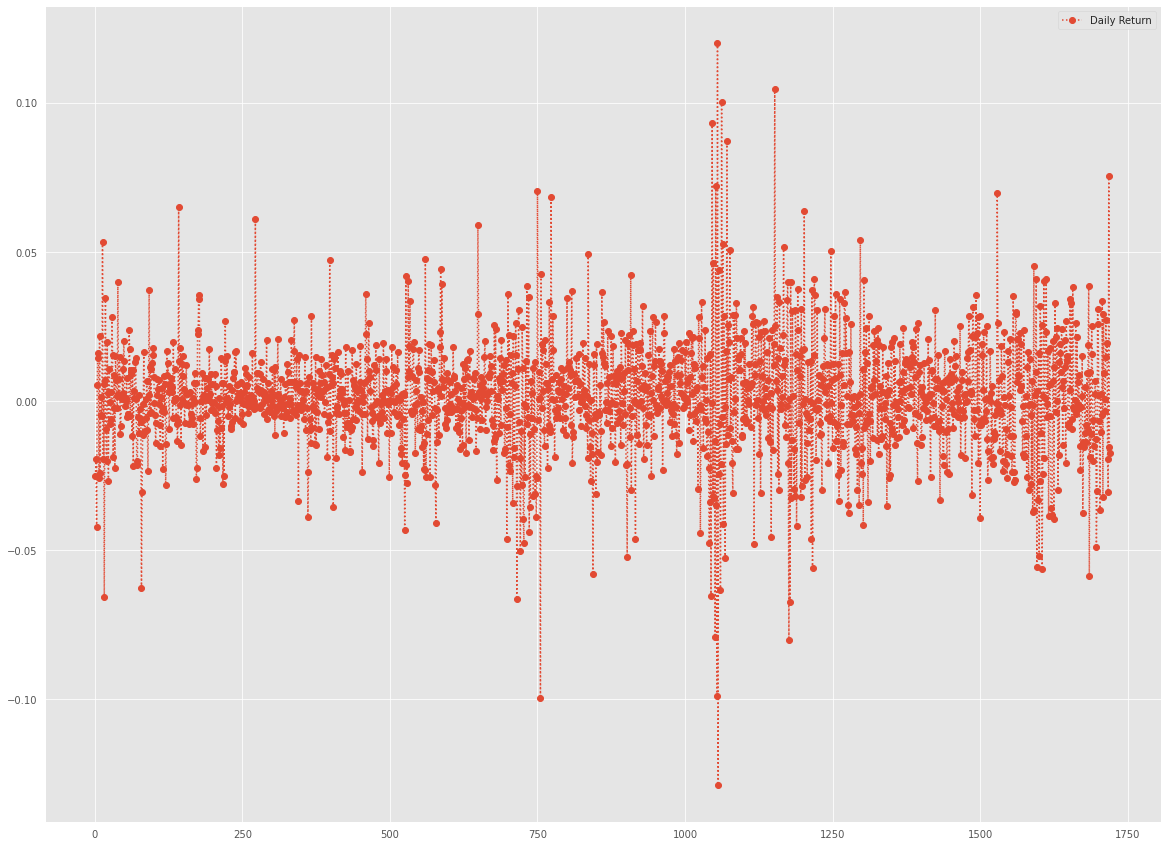

In [61]:
#Adding moving averages to the dataset

m_avg_day = [10, 50 ,100]
for i in m_avg_day:
    column_name = 'M_avg for %s days' %(str(i))
    dataset[column_name] = pd.DataFrame.rolling(dataset['Close'],i).mean()

dataset['Daily Return'] = dataset['Close'].pct_change()

# plotting Daily Return

dataset['Daily Return'].plot(figsize=(20,15),legend=True,linestyle=':',marker='o')
plt.show()

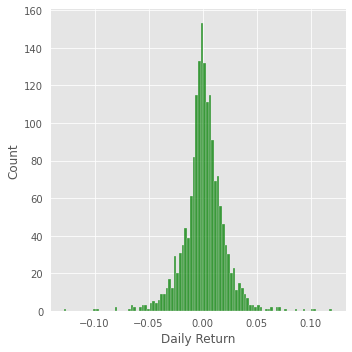

In [60]:
sns.displot(dataset['Daily Return'].dropna(),bins=100,color='green')
plt.show()

In [67]:
dataset.reset_index(drop=True, inplace=True)
dataset.fillna(dataset.mean(), inplace=True)
dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Date,Open,High,Low,Close,Adj Close,Volume,M_avg for 10 days,M_avg for 50 days,M_avg for 100 days,Daily Return
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,24.151497,270597600,77.650153,77.457922,77.035057,0.001195
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.546280,223164000,77.650153,77.457922,77.035057,-0.025059
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,23.085480,273829600,77.650153,77.457922,77.035057,-0.019570
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,22.111170,324377600,77.650153,77.457922,77.035057,-0.042205
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.228085,283192000,77.650153,77.457922,77.035057,0.005288


In [62]:
dataset.nunique()

Date                  1721
Open                  1657
High                  1638
Low                   1658
Close                 1651
Adj Close             1696
Volume                1715
M_avg for 10 days     1709
M_avg for 50 days     1672
M_avg for 100 days    1622
Daily Return          1717
dtype: int64

In [68]:
dataset.sort_index(axis=1,ascending=True)

,Adj Close,Close,Daily Return,Date,High,Low,M_avg for 10 days,M_avg for 100 days,M_avg for 50 days,Open,Volume
0,24.151497,26.337500,0.001195,2016-01-04,26.342501,25.500000,77.650153,77.035057,77.457922,25.652500,270597600
1,23.546280,25.677500,-0.025059,2016-01-05,26.462500,25.602501,77.650153,77.035057,77.457922,26.437500,223164000
2,23.085480,25.174999,-0.019570,2016-01-06,25.592501,24.967501,77.650153,77.035057,77.457922,25.139999,273829600
3,22.111170,24.112499,-0.042205,2016-01-07,25.032499,24.107500,77.650153,77.035057,77.457922,24.670000,324377600
4,22.228085,24.240000,0.005288,2016-01-08,24.777500,24.190001,77.650153,77.035057,77.457922,24.637501,283192000
...,...,...,...,...,...,...,...,...,...,...,...
1716,149.350006,149.350006,-0.019627,2022-10-26,151.990005,148.039993,145.319002,151.267000,152.763399,150.960007,88194300
1717,144.800003,144.800003,-0.030465,2022-10-27,149.050003,144.130005,145.500001,151.253600,152.168399,148.070007,109180200
1718,155.740005,155.740005,0.075552,2022-10-28,157.500000,147.820007,147.236001,151.323900,151.800200,148.199997,164762400
1719,153.339996,153.339996,-0.015410,2022-10-31,154.240005,151.919998,148.329001,151.377700,151.436599,153.160004,97943200


Text(0, 0.5, 'Closing price')

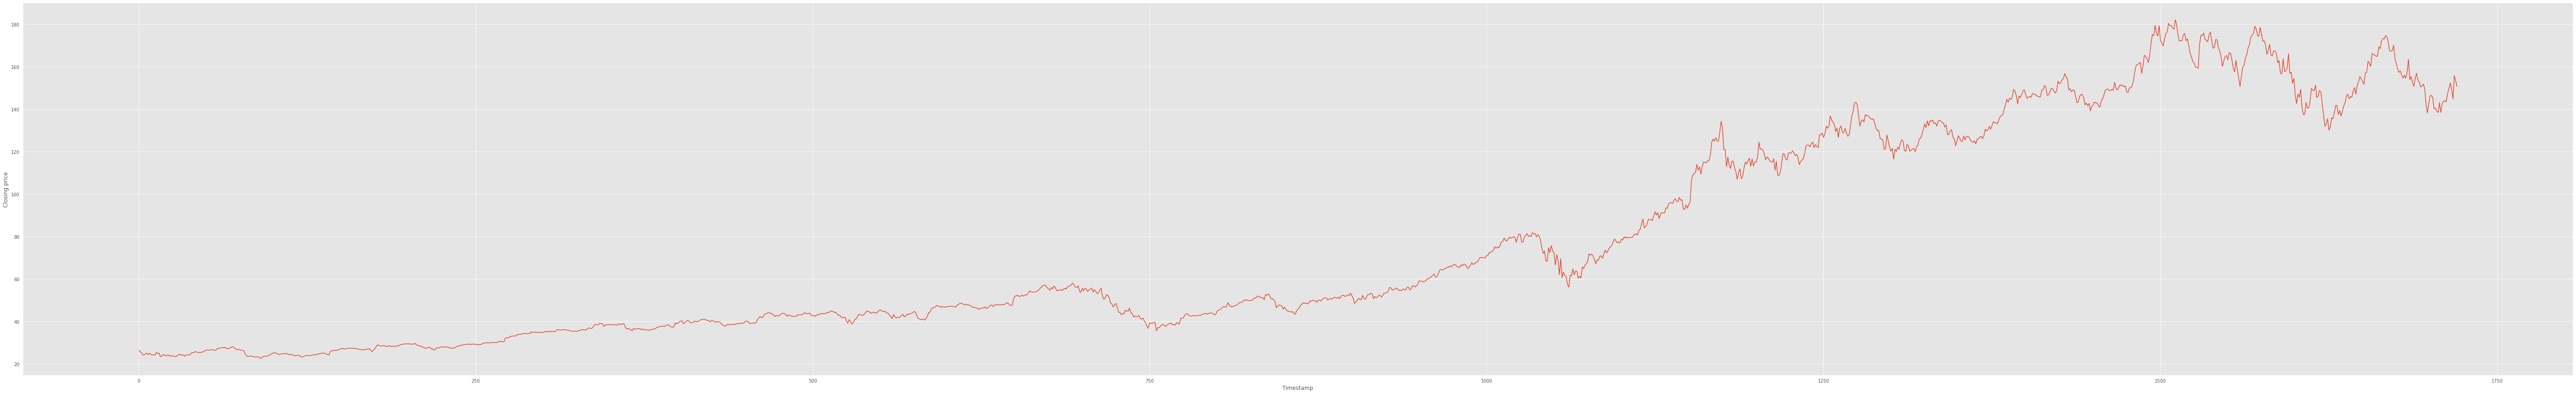

In [69]:
# plotting Close price of the dataset

plt.plot(dataset['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")

In [70]:
df = dataset
print(df)

            Date        Open        High         Low       Close   Adj Close  \
0     2016-01-04   25.652500   26.342501   25.500000   26.337500   24.151497   
1     2016-01-05   26.437500   26.462500   25.602501   25.677500   23.546280   
2     2016-01-06   25.139999   25.592501   24.967501   25.174999   23.085480   
3     2016-01-07   24.670000   25.032499   24.107500   24.112499   22.111170   
4     2016-01-08   24.637501   24.777500   24.190001   24.240000   22.228085   
...          ...         ...         ...         ...         ...         ...   
1716  2022-10-26  150.960007  151.990005  148.039993  149.350006  149.350006   
1717  2022-10-27  148.070007  149.050003  144.130005  144.800003  144.800003   
1718  2022-10-28  148.199997  157.500000  147.820007  155.740005  155.740005   
1719  2022-10-31  153.160004  154.240005  151.919998  153.339996  153.339996   
1720  2022-11-01  155.080002  155.449997  149.130005  150.649994  150.649994   

         Volume  M_avg for 10 days  M_a

In [71]:
dataset.isnull().sum()

Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
M_avg for 10 days     0
M_avg for 50 days     0
M_avg for 100 days    0
Daily Return          0
dtype: int64

In [75]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,1721.0,7.763900e+01,4.896233e+01,2.250000e+01,3.899250e+01,5.254000e+01,1.268200e+02,1.826300e+02
High,1721.0,7.853638e+01,4.961551e+01,2.291750e+01,3.930750e+01,5.316250e+01,1.279300e+02,1.829400e+02
Low,1721.0,7.679273e+01,4.832287e+01,2.236750e+01,3.862000e+01,5.206500e+01,1.252100e+02,1.791200e+02
Close,1721.0,7.770402e+01,4.899281e+01,2.258500e+01,3.897500e+01,5.248750e+01,1.266600e+02,1.820100e+02
Adj Close,1721.0,7.631056e+01,4.948308e+01,2.094961e+01,3.705389e+01,5.111225e+01,1.253785e+02,1.812599e+02
Volume,1721.0,1.219086e+08,5.775616e+07,4.100000e+07,8.418310e+07,1.064056e+08,1.417080e+08,5.334788e+08
M_avg for 10 days,1721.0,7.765015e+01,4.872549e+01,2.317750e+01,3.903825e+01,5.255925e+01,1.261050e+02,1.783320e+02
M_avg for 50 days,1721.0,7.745792e+01,4.758623e+01,2.393880e+01,4.027605e+01,5.325940e+01,1.266342e+02,1.726638e+02
M_avg for 100 days,1721.0,7.703506e+01,4.595837e+01,2.499158e+01,4.173868e+01,5.267705e+01,1.243261e+02,1.694848e+02
Daily Return,1721.0,1.194888e-03,1.898598e-02,-1.286469e-01,-7.282370e-03,9.433962e-04,1.051116e-02,1.198083e-01


In [74]:
df_close = df.reset_index()['Close']

In [22]:
df_close

0        37.091999
1        37.129002
2        37.181000
3        36.319500
4        35.723499
           ...    
1505    147.142502
1506    148.063995
1507    146.447998
1508    146.504501
1509    146.002502
Name: Close, Length: 1510, dtype: float64

In [76]:
# scaling close price of the data using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_close=scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [77]:
df_close = pd.DataFrame(df_close)
df_close

,0
0,0.023538
1,0.019398
2,0.016246
3,0.009581
4,0.010381
...,...
1716,0.795139
1717,0.766599
1718,0.835220
1719,0.820166


In [78]:
# Dividing training and test data for plotting

training_size = int(len(df_close)*0.75)
test_size = len(df_close)-training_size
train_data,test_data=df_close.iloc[0:training_size,0],df_close.iloc[training_size:,0]

In [79]:
train_data

0       0.023538
1       0.019398
2       0.016246
3       0.009581
4       0.010381
          ...   
1285    0.707574
1286    0.705943
1287    0.707449
1288    0.693775
1289    0.679034
Name: 0, Length: 1290, dtype: float64

In [80]:
test_data

1290    0.671946
1291    0.672950
1292    0.648675
1293    0.647797
1294    0.644598
          ...   
1716    0.795139
1717    0.766599
1718    0.835220
1719    0.820166
1720    0.803293
Name: 0, Length: 431, dtype: float64

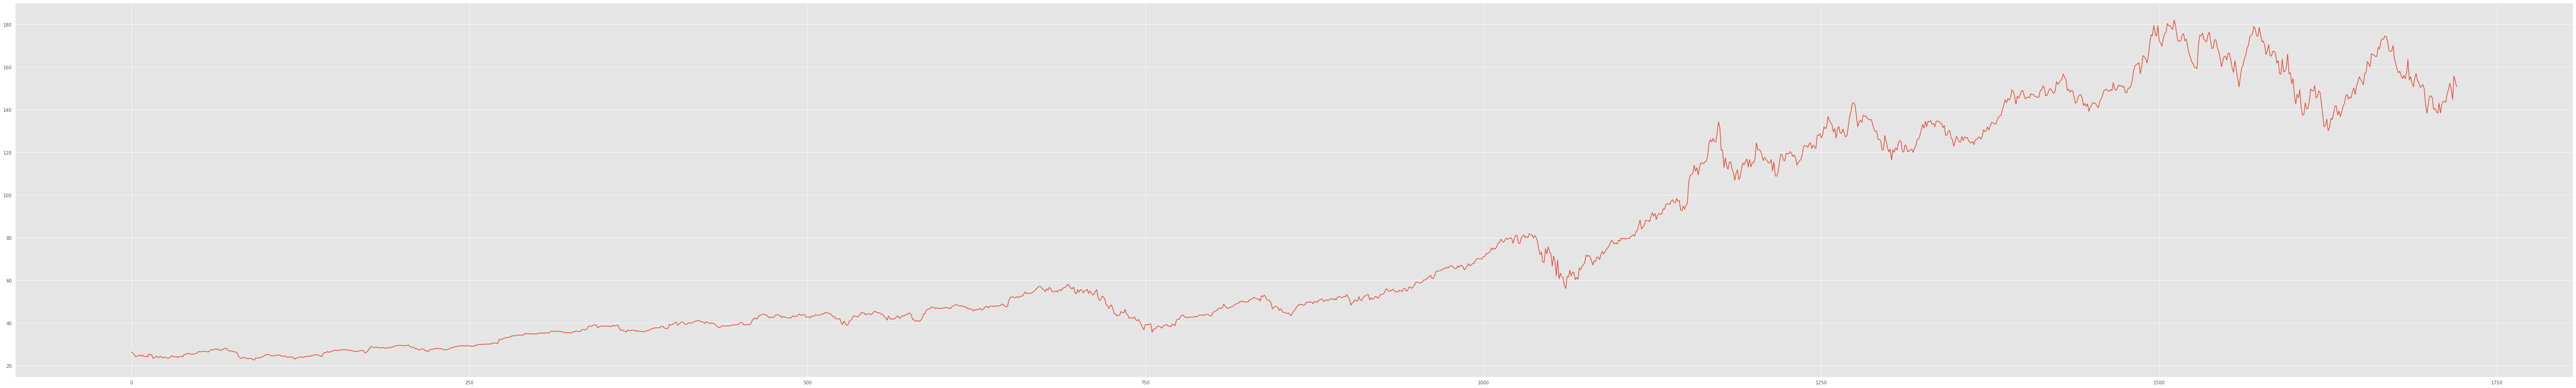

In [81]:
# Plotting training data,test data, and close price of the dataset 
train_dataPlot = np.empty_like(df_close)
train_dataPlot[:, :] = np.nan
train_dataPlot[0:len(train_data),0] = train_data

test_dataPlot = np.empty_like(df_close)
test_dataPlot[:, :] = np.nan
test_dataPlot[len(train_data):len(df_close),0] = test_data

plt.figure(figsize=(100,15))
plt.plot(scaler.inverse_transform(df_close))


plt.show()

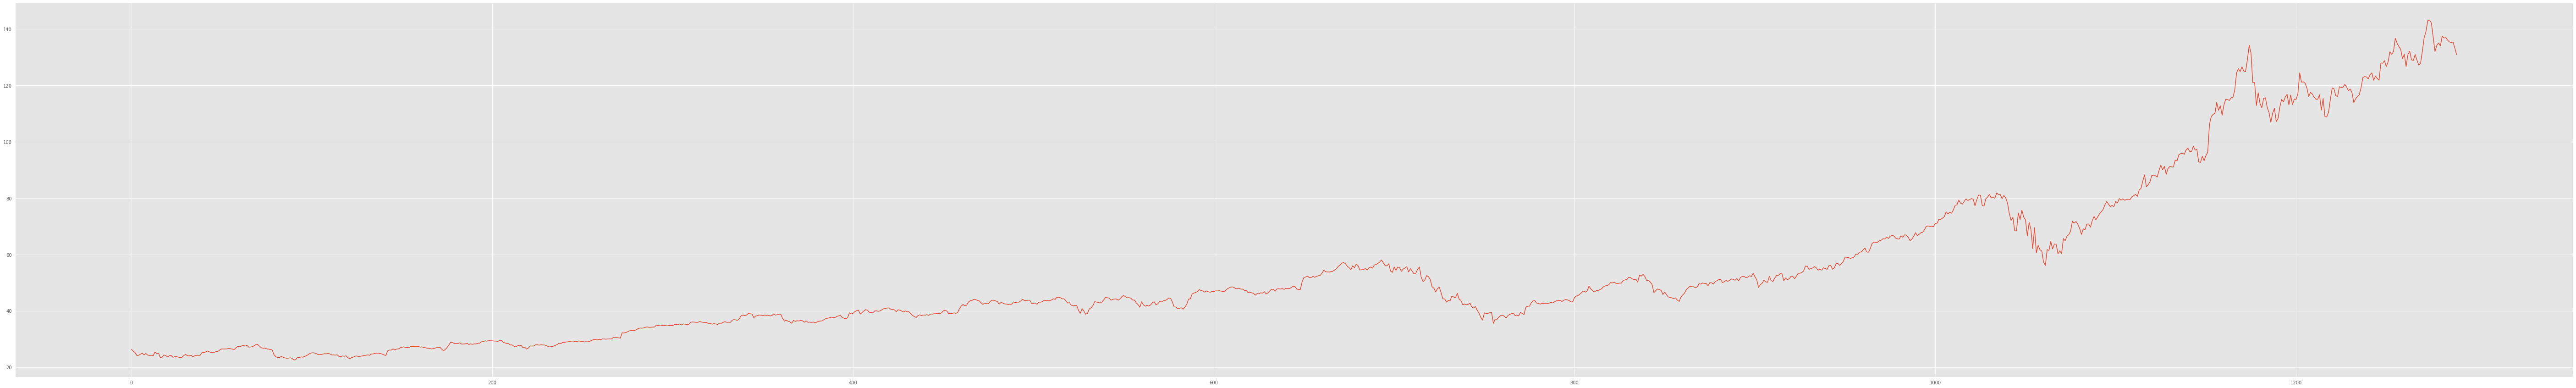

In [82]:
plt.plot(scaler.inverse_transform(train_dataPlot))
plt.show()

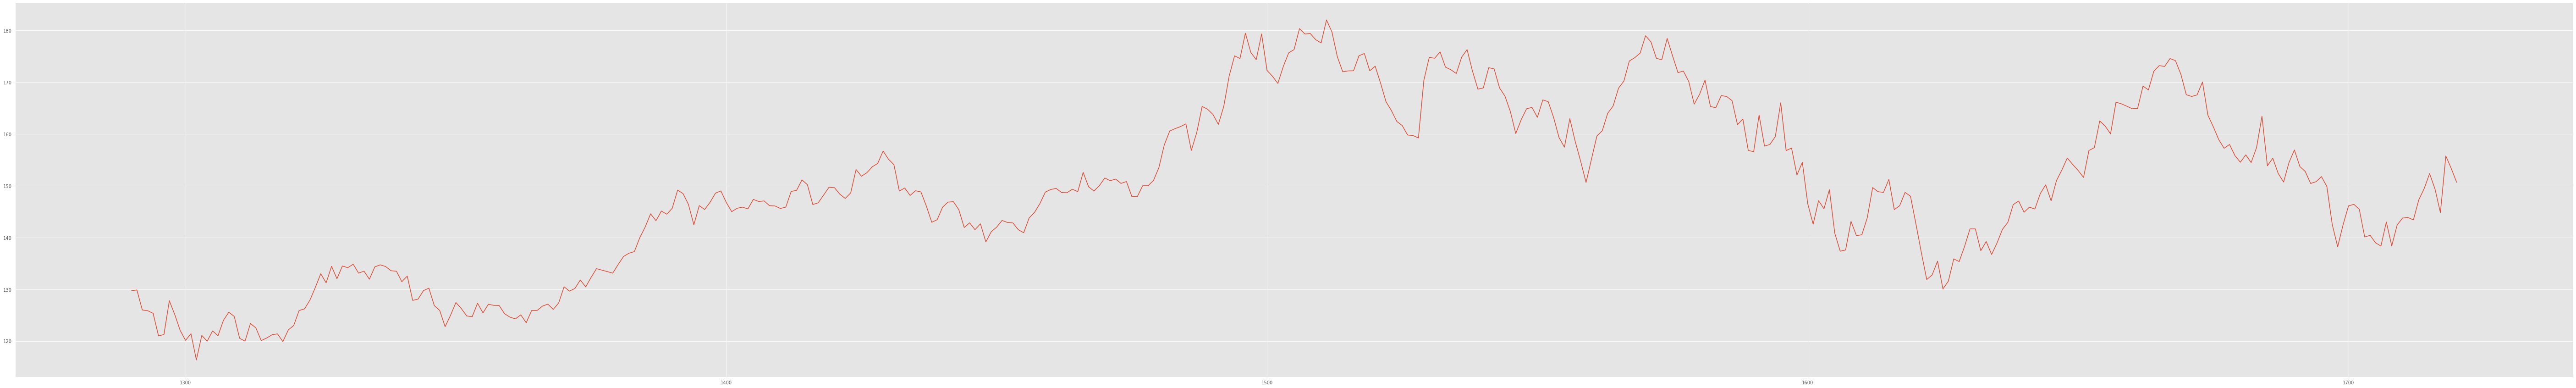

In [83]:
plt.plot(scaler.inverse_transform(test_dataPlot))
plt.show()

In [84]:
#preparing data in time series format with the help of time step

X = []
Y = []
time_step=100
for i in range(1 , len(df_close) - time_step -1 , 1):
    temp = []
    temp2 = []
    for j in range(time_step):
        temp.append(df_close.iloc[i + j, 0])
    temp2.append(df_close.iloc[i + time_step, 0])
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

In [85]:
#splitting data into train and test for prediction

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

In [86]:
#reshaping data

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

In [87]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

In [88]:
# model layers including CNN and LSTM

cnn_lstm_model = tf.keras.models.Sequential([
    
    tf.keras.layers.TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))),
    tf.keras.layers.TimeDistributed(MaxPooling1D(2)),
    tf.keras.layers.TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')),
    tf.keras.layers.TimeDistributed(MaxPooling1D(2)),
    tf.keras.layers.TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')),
    tf.keras.layers.TimeDistributed(MaxPooling1D(2)),
    tf.keras.layers.TimeDistributed(Flatten()),
    
    tf.keras.layers.Bidirectional(LSTM(100, return_sequences=True)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(LSTM(100, return_sequences=False)),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(1, activation='linear')

])

In [89]:
#compiling and training the model

cnn_lstm_model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = cnn_lstm_model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
33/33 [==============================] - 13s 103ms/step - loss: 0.0457 - mse: 0.0457 - mae: 0.1343 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0448
Epoch 2/40
33/33 [==============================] - 2s 47ms/step - loss: 0.0073 - mse: 0.0073 - mae: 0.0572 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0404
Epoch 3/40
33/33 [==============================] - 2s 49ms/step - loss: 0.0064 - mse: 0.0064 - mae: 0.0533 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0443
Epoch 4/40
33/33 [==============================] - 2s 47ms/step - loss: 0.0063 - mse: 0.0063 - mae: 0.0518 - val_loss: 0.0030 - val_mse: 0.0030 - val_mae: 0.0407
Epoch 5/40
33/33 [==============================] - 2s 48ms/step - loss: 0.0054 - mse: 0.0054 - mae: 0.0490 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0406
Epoch 6/40
33/33 [==============================] - 2s 46ms/step - loss: 0.0048 - mse: 0.0048 - mae: 0.0464 - val_loss: 0.0026 - val_mse: 0.0026 - val_mae: 0.0354
Epoch 7/40
33/33 [==

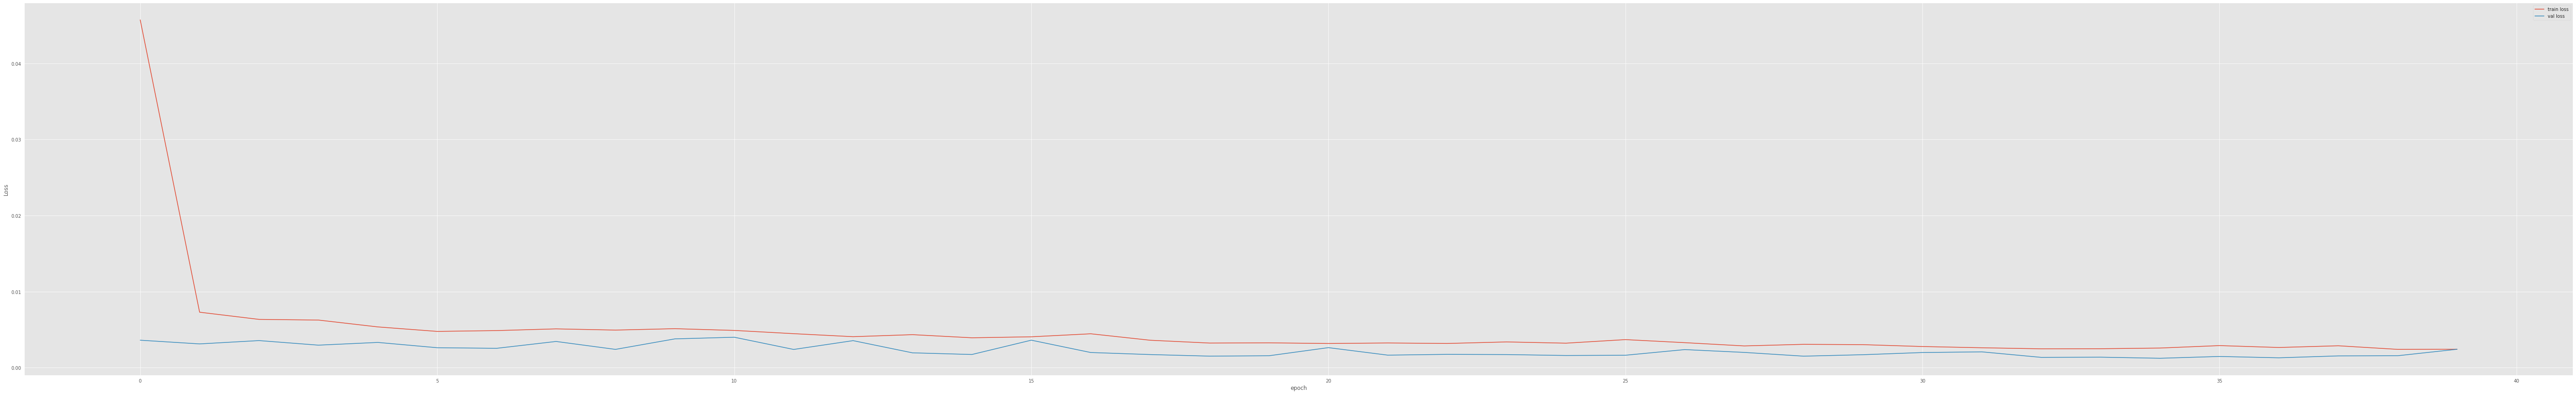

In [90]:
#plotting training and validation loss

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

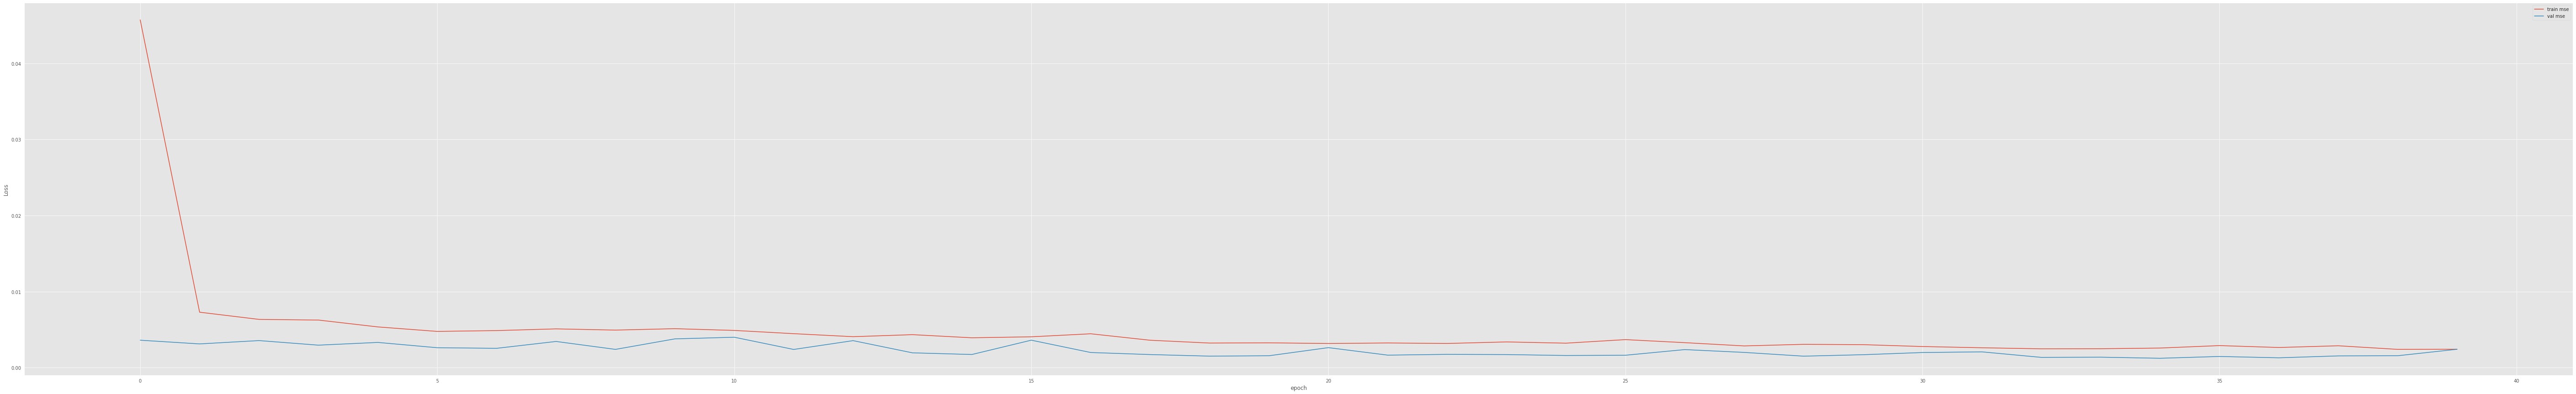

In [91]:
#plotting training and validation MSE

plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()


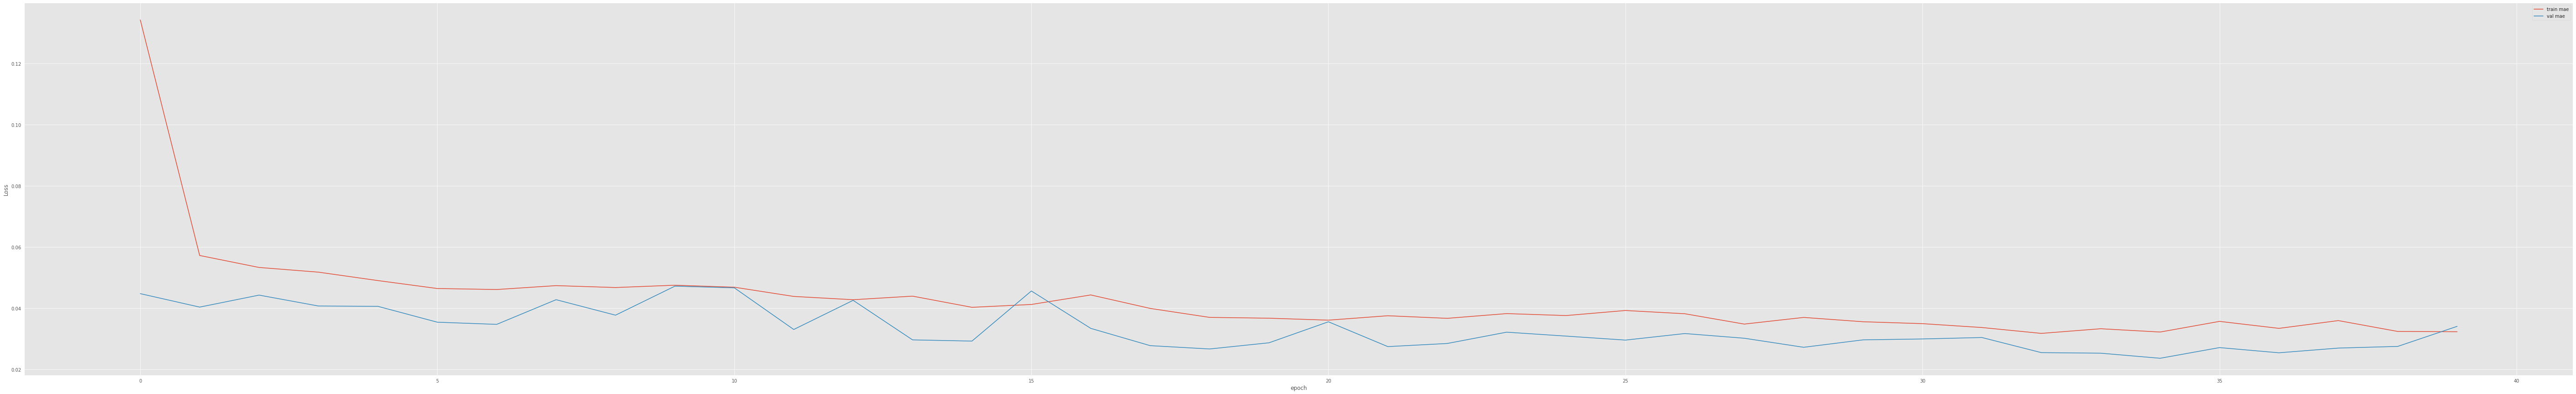

In [92]:
#plotting training and validation MAE

plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [93]:
#summary of the CNN-LSTM model

from tensorflow.keras.utils import plot_model
print(cnn_lstm_model.summary())
# plot_model(cnn_lstm_model, to_file='CNN_LSTM_Model.png', show_shapes=True, show_layer_names=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_7 (TimeDis  (None, 1, 98, 64)        256       
 tributed)                                                       
                                                                 
 time_distributed_8 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_9 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_10 (TimeDi  (None, 1, 23, 128)       0         
 stributed)                                                      
                                                                 
 time_distributed_11 (TimeDi  (None, 1, 21, 128)      

In [94]:
# evaluating the model

cnn_lstm_model.evaluate(test_X, test_Y)

11/11 [==============================] - 0s 12ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0341


[0.0024242957588285208, 0.0024242957588285208, 0.03406543284654617]

In [95]:
# calculating variance, R2 score and Max error of the model

from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

y_pred_prob = cnn_lstm_model.predict(test_X, verbose=0)
y_pred_prob = y_pred_prob[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), y_pred_prob)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), y_pred_prob)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), y_pred_prob)
print('Max Error: %f' % var2)

Variance: 0.982943
R2 Score: 0.982943
Max Error: 0.176009


11/11 [==============================] - 0s 13ms/step


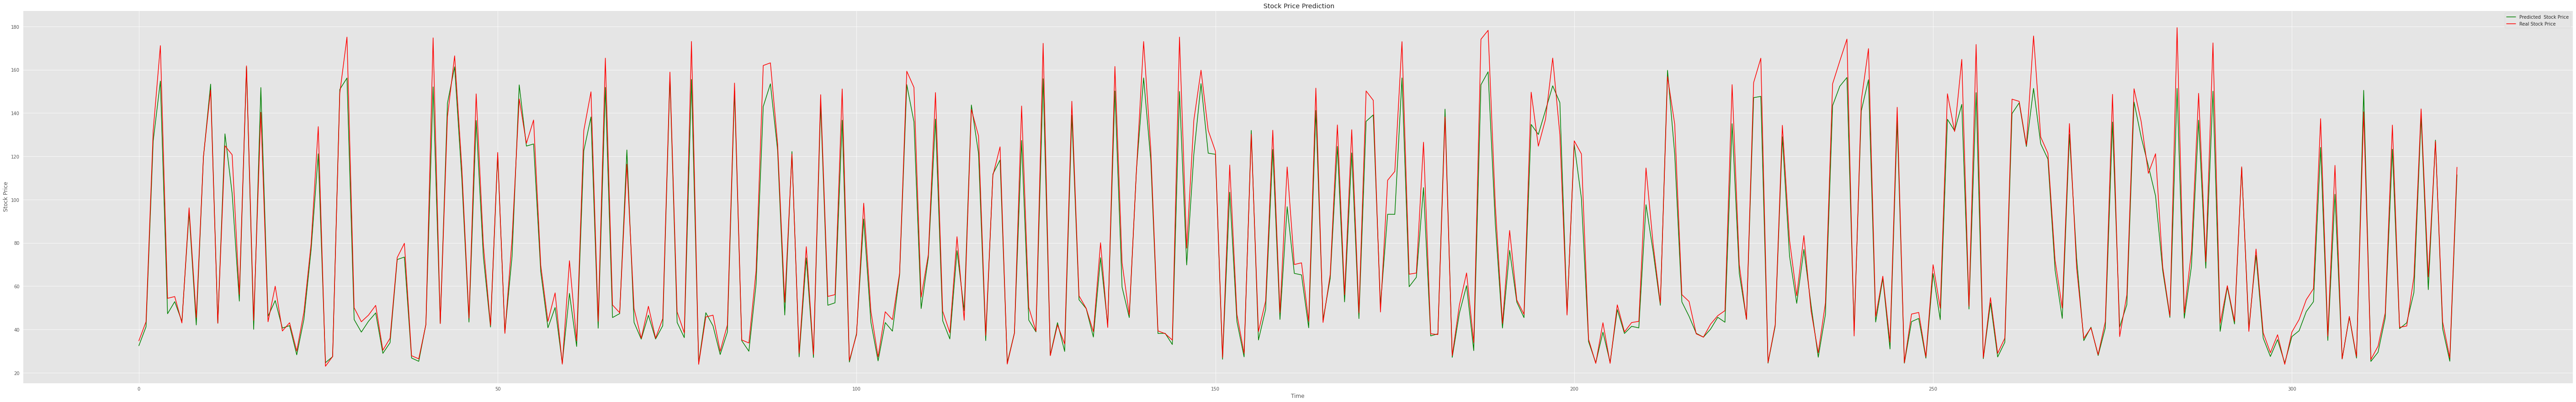

In [96]:
# plotting predicted value and test label

from pylab import rcParams
rcParams['figure.figsize'] = [100,15]

predicted  = cnn_lstm_model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_train = len(train_X)
plt.plot(scaler.inverse_transform(predicted), color = 'green', label = 'Predicted  Stock Price')
plt.plot(scaler.inverse_transform(test_label), color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [97]:
scaler.inverse_transform(predicted)

array([[ 32.50111 ],
       [ 41.250217],
       [127.12726 ],
       [154.7166  ],
       [ 47.280552],
       [ 52.849438],
       [ 43.70025 ],
       [ 94.136765],
       [ 42.083378],
       [119.553505],
       [153.34203 ],
       [ 42.872192],
       [130.38254 ],
       [102.7791  ],
       [ 53.089684],
       [161.27254 ],
       [ 40.06382 ],
       [151.76915 ],
       [ 46.1248  ],
       [ 53.350628],
       [ 40.63894 ],
       [ 41.785473],
       [ 28.293823],
       [ 44.693096],
       [ 76.7462  ],
       [121.14934 ],
       [ 24.65275 ],
       [ 27.443039],
       [150.9178  ],
       [156.16264 ],
       [ 44.57579 ],
       [ 38.783592],
       [ 43.793274],
       [ 47.654438],
       [ 28.978106],
       [ 33.880104],
       [ 72.30278 ],
       [ 73.448235],
       [ 26.810875],
       [ 25.281963],
       [ 42.426   ],
       [152.07576 ],
       [ 42.856503],
       [144.54346 ],
       [161.35744 ],
       [109.90793 ],
       [ 43.411793],
       [136.5

In [98]:
scaler.inverse_transform(test_label)

array([[ 34.75    ],
       [ 43.5825  ],
       [131.940002],
       [171.139999],
       [ 54.395   ],
       [ 55.205002],
       [ 43.0075  ],
       [ 96.190002],
       [ 45.43    ],
       [119.900002],
       [150.619995],
       [ 42.9025  ],
       [124.849998],
       [120.709999],
       [ 56.147499],
       [161.789993],
       [ 44.205002],
       [140.360001],
       [ 43.560001],
       [ 59.990002],
       [ 39.2925  ],
       [ 43.110001],
       [ 30.      ],
       [ 48.07    ],
       [ 79.5625  ],
       [133.720001],
       [ 23.01    ],
       [ 27.497499],
       [149.240005],
       [175.080002],
       [ 50.025002],
       [ 43.5625  ],
       [ 46.6325  ],
       [ 51.125   ],
       [ 30.407499],
       [ 35.924999],
       [ 73.230003],
       [ 79.807503],
       [ 27.865   ],
       [ 26.4475  ],
       [ 42.357498],
       [174.720001],
       [ 42.700001],
       [138.270004],
       [166.419998],
       [115.050003],
       [ 45.227501],
       [148.8